In [43]:
import numpy as np
from sympy import *
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import time

This notebook solves the stochastic Poisson's equation $$k(\theta) \partial_{xx} u(x) = f(x)$$ for $x \in \Omega := [0,1]$, $k(\theta) \approx$ log-normal$(\mu, \sigma^2)$ and boundary conditions $u(0) = a$ and $u(1) = b$ using Monte Carlo. Each sampled problem is solved using a Galerkin method. We start by importing the deterministic Galerkin code.

In [73]:
%run Galerkin1DElliptic.ipynb

In [74]:
N = 20                               # number of spacialpoints
Omega = np.linspace(0, 1, N)         # spacial domain
f = lambda x: -1                     # source function
u0 = 0                               # u(0)
uN = 0                               # u(1)
dx = Omega[1] - Omega[0]             # step size

In particular, this notebook preforms 3 different tasks:
    
    1. Computes the solution for a given number of Monte Carlo iterations;
    2. Computes the mean of the sample solutions;
    3. Computes the variance of the sample solutions;
    4. Gives the time it takes to complete each one of these tasks as well as the total time.

In [88]:
itr = 100  # number of iterations
miu = 1     # mean of the convection term
sigma = 0.1 # variance of the convection term

conv_vector = np.random.normal(miu, sigma, itr) # vector of convective terms

### 1.  Computes the solution for a given number of Monte Carlo iterations;

In [89]:
solutions = np.zeros((itr, N))

start_time = time.time()
for i in range(itr):
    k = lambda x: np.exp(conv_vector[i])
    solutions[i,] = Galerkin1DElliptic(N, f, 0, 1, u0, uN, k, np.zeros(N))
end_time = time.time()
print('It takes ', end_time - start_time, ' seconds find ', itr, ' Monte Carlo iterations')

It takes  12.15710735321045  seconds find the mean solution for  100  Monte Carlo iterations


The plot of the solutions is given below:

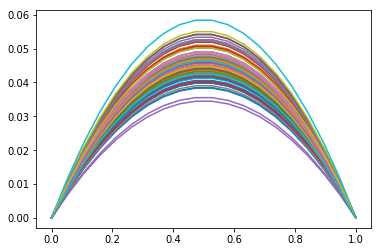

In [90]:
for i in range(itr):
    plt.plot(Omega, solutions[i,])
    
plt.show()

### 2.  Computes the mean of the sample solutions

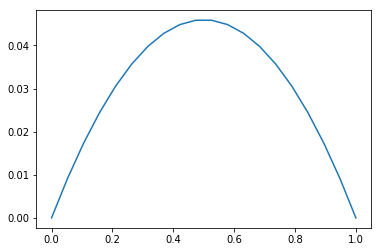

In [93]:
solutions_mean = np.mean(solutions, axis=0)
plt.plot(Omega,solutions_mean)

In [ ]:
### 3.  Computes the variance of the sample solutions

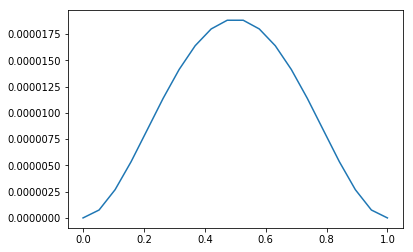

In [95]:
solutions_var = np.var(solutions, axis=0)
plt.plot(Omega,solutions_var)